In [23]:
!pip install --quiet gdown


file_id = "1CSkQOyYbQ0aHf67ETLJ58Gp5RlnPkSxZ"
url = f"https://drive.google.com/uc?id={file_id}"

!gdown --quiet $url -O si.lammps-dump-text

file_id = "1JCFXgqru7S-DCJIZO2Xvar87Tdgfx3qZ"
url = f"https://drive.google.com/uc?id={file_id}"

!gdown --quiet $url -O si_solid.lammps-dump-text

In [24]:
!pip install ase numpy matplotlib
from ase.io import read
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

In [25]:
# ----------- File paths -----------
file_liquid = "si.lammps-dump-text"
file_solid  = "si_solid.lammps-dump-text"

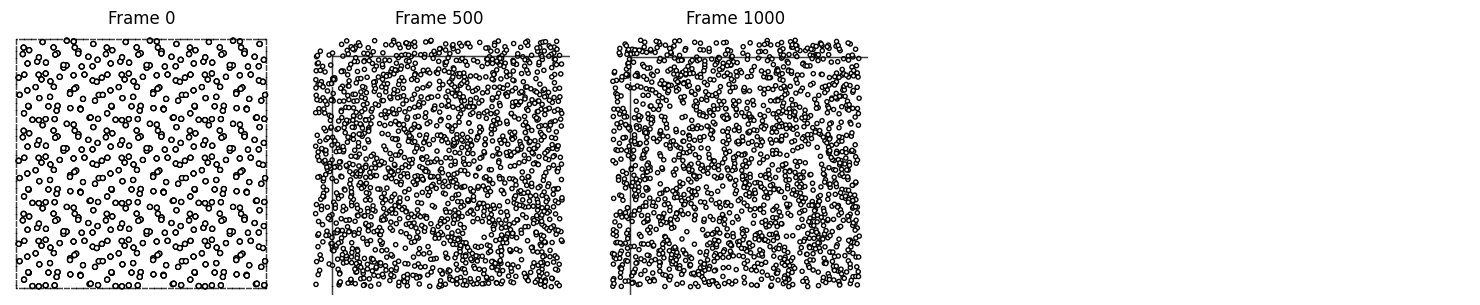

In [29]:
# Frame interval: step size between frames to read from the dump file
dfr = 500

# Read frames from the LAMMPS dump file starting at frame 0 up to frame 1000,
# taking every dfr-th frame (i.e., 0, 500, 1000, ...)
frames = read(file_liquid, index=slice(0, 1001, dfr), format="lammps-dump-text")
n = len(frames)  # Number of frames read

# Set number of columns in the plot grid
cols = 5
# Calculate required number of rows to fit all frames in the grid
rows = (n + cols - 1) // cols

# Create a figure and a grid of subplots with calculated rows and cols
# The figure size scales with the number of rows to keep plots readable
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# Loop over each loaded frame (atoms object)
for i, atoms in enumerate(frames):
    # Calculate the row and column index in the subplot grid
    row = i // cols
    col = i % cols
    # Access the appropriate Axes object; if multiple rows, axes is 2D array, else 1D
    ax = axes[row, col] if rows > 1 else axes[col]

    # Plot atomic structure on the selected subplot
    # Rotate the view by 90 degrees around the x-axis and show unit cell
    plot_atoms(atoms, ax=ax, rotation='90x', show_unit_cell=True)

    # Compute original frame index in the full dump based on step size
    frame_number = i * dfr
    # Set the subplot title to indicate the frame number
    ax.set_title(f"Frame {frame_number}")
    # Hide axes ticks and labels for a cleaner look
    ax.axis('off')

# After plotting all frames, hide any unused subplots in the grid
for j in range(n, rows * cols):
    row = j // cols
    col = j % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')  # Turn off axis for empty subplots

# Adjust subplot layout to minimize overlap and improve spacing
plt.tight_layout()
# Display the final plot window with all frames visualized
plt.show()

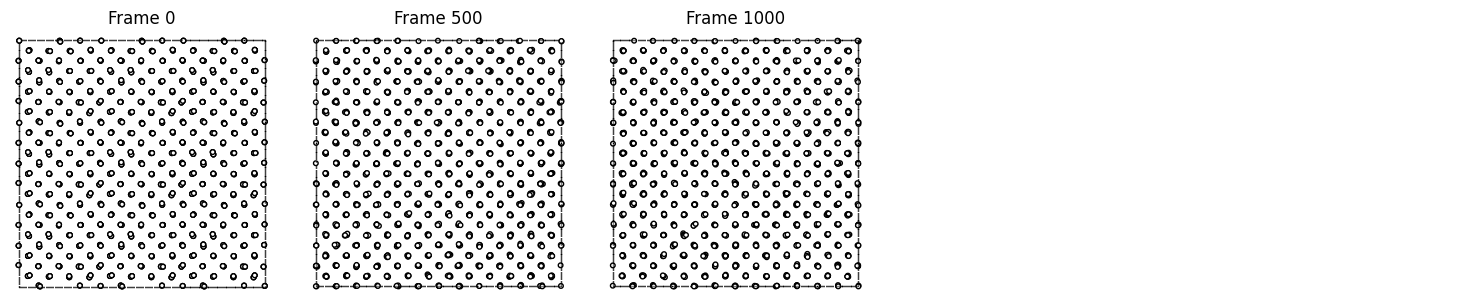

In [30]:
# Frame interval: step size between frames to read from the dump file
dfr = 500

# Read frames from the LAMMPS dump file starting at frame 0 up to frame 1000,
# taking every dfr-th frame (i.e., 0, 500, 1000, ...)
frames = read(file_solid, index=slice(0, 1001, dfr), format="lammps-dump-text")
n = len(frames)  # Number of frames read

# Set number of columns in the plot grid
cols = 5
# Calculate required number of rows to fit all frames in the grid
rows = (n + cols - 1) // cols

# Create a figure and a grid of subplots with calculated rows and cols
# The figure size scales with the number of rows to keep plots readable
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

# Loop over each loaded frame (atoms object)
for i, atoms in enumerate(frames):
    # Calculate the row and column index in the subplot grid
    row = i // cols
    col = i % cols
    # Access the appropriate Axes object; if multiple rows, axes is 2D array, else 1D
    ax = axes[row, col] if rows > 1 else axes[col]

    # Plot atomic structure on the selected subplot
    # Rotate the view by 90 degrees around the x-axis and show unit cell
    plot_atoms(atoms, ax=ax, rotation='90x', show_unit_cell=True)

    # Compute original frame index in the full dump based on step size
    frame_number = i * dfr
    # Set the subplot title to indicate the frame number
    ax.set_title(f"Frame {frame_number}")
    # Hide axes ticks and labels for a cleaner look
    ax.axis('off')

# After plotting all frames, hide any unused subplots in the grid
for j in range(n, rows * cols):
    row = j // cols
    col = j % cols
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.axis('off')  # Turn off axis for empty subplots

# Adjust subplot layout to minimize overlap and improve spacing
plt.tight_layout()
# Display the final plot window with all frames visualized
plt.show()
